# Load assessment data CSV

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', 10)
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

url = 'https://raw.githubusercontent.com/nbdata/assessment-parser/master/output.csv'
df = pd.read_csv(url)
df.sort_values(by='ID')
df.head()

,ID,Street,Non-Homestead,Account,Code,2016 City,2016 Full,2017 City,2017 Full,2018 City,2018 Full,2019 City,2019 Full,Sale Date,Sale Price,Sale AV
0,1-1-1,Pierces Rd,1,241601,340,32800.00,32800.00,32800.00,32800.00,32800.00,32800.00,98700,98700,NaN,nan,nan
1,1-1-3,52 Pierces Rd,1,241876,464,502800.00,502800.00,496500.00,496500.00,496500.00,496500.00,496500,496500,NaN,nan,nan
2,1-1-4.1,Scobie Dr,1,674810,692,0.00,18300.00,0.00,54900.00,0.00,54900.00,0,54900,NaN,nan,nan
3,1-1-4.2,98 Scobie Dr,1,271550,449,1249700.00,1249700.00,1249700.00,1249700.00,1249700.00,1249700.00,1249700,1249700,NaN,nan,nan
4,1-1-4.31,1 Scobie Dr,1,271660,449,317125.00,737500.00,321941.00,748700.00,321941.00,748700.00,321941,748700,NaN,nan,nan


# How many properties are exempt ($0 city taxable value)?

In [27]:
exempt = df[df['2019 City'] < 1]
exempt[['2019 Full']].agg(['count', 'sum'])


,2019 Full
count,455
sum,544741825


# Count of exempt properties by class code



```
620 = Religious
963 = City Public Park
438 = Parking Lot
330 = Vacant Commercial
210 = Single-family
311 = Vacant Residential
```



In [28]:
ex_agg = exempt[['Code', '2019 Full']].groupby('Code', as_index=False)['2019 Full'].agg({'avg':'mean', 'count':'count'})
ex_cnt = ex_agg[ex_agg['count'] > 20].sort_values(by=['count'], ascending=False).head(10)
print(ex_cnt.to_string(index=False))



 Code       avg  count
  311  14996.01     69
  620 902971.70     53
  210  92877.78     36
  330  97140.74     27
  438 105114.29     21
  963 384428.57     21


# What percentage of 2019 full market value is exempt?

In [30]:
totalsum = df['2019 Full'].sum()
exemptsum = exempt['2019 Full'].sum()
exemptsum / totalsum

0.3539482769099096

# What were the biggest increases in single-family assessed value 2016 - 2017?

In [31]:
sf = df[df['Code'] == 210].reset_index()
sf = sf[sf['2019 City'] > 0].reset_index()
sf['2017 Dollar Increase'] = sf['2017 Full'] - sf['2016 Full']
sf['2017 Increase'] = 100 * (sf['2017 Dollar Increase'] / sf['2016 Full'])
sf[['ID', 'Street', '2016 Full', '2017 Full', '2017 Increase']].sort_values(by=['2017 Increase'], ascending=False).head(10)


,ID,Street,2016 Full,2017 Full,2017 Increase
1491,26-3-5.3,23 Morris Ave,22500.00,189720.00,743.20
1910,36-2-15,152 Ann St,1500.00,12000.00,700.00
2135,4-8-20,21 Leroy Pl,45000.00,339200.00,653.78
2300,48-12-22,84 Henry Ave,19800.00,134400.00,578.79
1909,36-2-13.2,150 Ann St,1800.00,12000.00,566.67
1911,36-2-16,154 Ann St,2000.00,12000.00,500.00
1419,26-1-6.1,157 Dupont Ave Front,21600.00,67400.00,212.04
1180,22-5-30,254 First St,15500.00,45900.00,196.13
71,11-5-10,309 Liberty St,10300.00,30100.00,192.23
2323,48-3-22,24 Courtney Ave,74600.00,174200.00,133.51


# What were the biggest increases in single-family assessed value 2017 - 2018?

In [32]:
sf['2018 Dollar Increase'] = sf['2018 Full'] - sf['2017 Full']
sf['2018 Increase'] = 100 * (sf['2018 Dollar Increase'] / sf['2017 Full'])
sf[['ID', 'Street', '2017 Full', '2018 Full', '2018 Increase']].sort_values(by=['2018 Increase'], ascending=False).head(10)

,ID,Street,2017 Full,2018 Full,2018 Increase
1909,36-2-13.2,150 Ann St,12000.00,145200.00,1110.00
1910,36-2-15,152 Ann St,12000.00,145200.00,1110.00
1911,36-2-16,154 Ann St,12000.00,145200.00,1110.00
1912,36-2-17,156 Ann St,12000.00,145200.00,1110.00
239,14-2-16.13,156 Orchard St,24600.00,208500.00,747.56
238,14-2-16.12,144 Orchard St,24500.00,195200.00,696.73
745,18-4-45,155 Lander St,12900.00,74400.00,476.74
2212,45-6-19,44 Carson Ave,43700.00,250000.00,472.08
1050,20-3-34,446 First St,26600.00,116700.00,338.72
1060,21-1-1,387 Third St,33900.00,140600.00,314.75


# What were the biggest increases in single-family assessed value 2018 - 2019?

In [33]:
sf['2019 Dollar Increase'] = sf['2019 Full'] - sf['2018 Full']
sf['2019 Increase'] = 100 * (sf['2019 Dollar Increase'] / sf['2018 Full'])
sf[['ID', 'Street', '2018 Full', '2019 Full', '2019 Increase']].sort_values(by=['2019 Increase'], ascending=False).head(10)

,ID,Street,2018 Full,2019 Full,2019 Increase
1821,30-2-18,23 Johnston St,10900.00,153800,1311.01
1822,30-2-19,21 Johnston St,10900.00,153800,1311.01
0,10-1-15,279 Grand St,13100.00,63600,385.50
1826,30-2-37,20 S Miller St,26700.00,121900,356.55
2324,48-3-24,28 Courtney Ave,19300.00,59500,208.29
1014,20-1-53,76 West St,47200.00,144800,206.78
1797,3-9-27,324 Robinson Ave,20500.00,62600,205.37
1837,30-4-17,33 Chambers St,63400.00,182900,188.49
71,11-5-10,309 Liberty St,35600.00,100100,181.18
699,18-10-10,154 Third St,78400.00,211700,170.03


# What were the biggest decreases in single-family assessed value 2018 - 2019?

In [34]:
sf[['ID', 'Street', '2018 Full', '2019 Full', '2019 Increase']].sort_values(by=['2019 Increase'], ascending=True).head(10)

,ID,Street,2018 Full,2019 Full,2019 Increase
1177,22-5-22,236 First St,10400.00,4700,-54.81
1786,3-9-1,7 Cottage Ave,124500.00,58700,-52.85
2228,45-7-22,46 Overlook Pl,104400.00,56500,-45.88
2083,4-10-30,520 Liberty St,110000.00,63100,-42.64
1632,28-3-11,15 Prospect St,68200.00,45900,-32.70
1804,3-9-5,31 Cottage Ave,112000.00,75900,-32.23
2092,4-3-2,15 North St,194900.00,137300,-29.55
1753,3-4-10,116 North St,135700.00,98500,-27.41
1807,3-9-8,19 Cottage Ave,140900.00,109500,-22.29
2173,44-5-20,202 Overlook Pl,113300.00,90700,-19.95


# What is the breakdown between homestead and non-homestead?

```
0 = Homestead
1= Non-Homestead
2=Non-HMSTD (Special)
```



In [35]:
df[['ID', 'Non-Homestead', '2019 Full']].groupby('Non-Homestead').describe()

2019 Full                                                    \
                  count      mean        std      min       25%       50%   
Non-Homestead                                                               
0               5279.00 113163.88   67856.39     0.00  74100.00 109600.00   
1               1635.00 570813.66 3118664.73     0.00  69200.00 145900.00   
2                 40.00 209277.50  145784.39 57200.00 139350.00 165200.00   

                                     
                    75%         max  
Non-Homestead                        
0             143200.00   626000.00  
1             293950.00 71634800.00  
2             220075.00   972400.00

# 2019 Full Market value breakdown by class code

Description of [class codes is available here](https://www.cityofnewburgh-ny.gov/sites/newburghny/files/u153/property_class_codes.pdf) 

In [36]:
df[['ID', 'Code', '2019 Full']].groupby(['Code']).describe()

2019 Full                                                        \
         count       mean       std        min        25%        50%   
Code                                                                   
210    3068.00  127277.03  63025.62    3000.00   90075.00  118550.00   
220    1240.00  110937.50  55275.38    8000.00   78400.00   98550.00   
230     448.00  130326.34  68770.92   11300.00   91750.00  118500.00   
271       1.00   41400.00       nan   41400.00   41400.00   41400.00   
280      20.00  172770.00  90446.65   82000.00  127275.00  157800.00   
...        ...        ...       ...        ...        ...        ...   
882       1.00     664.00       nan     664.00     664.00     664.00   
884       1.00 2296564.00       nan 2296564.00 2296564.00 2296564.00   
885       1.00  576609.00       nan  576609.00  576609.00  576609.00   
961       1.00    2500.00       nan    2500.00    2500.00    2500.00   
963      21.00  384428.57 881998.35     300.00    2400.00   41600.00   

                            
            75%        max  
Code                        
210   154725.00  549800.00  
220   132525.00  626000.00  
230   157075.00  489900.00  
271    41400.00   41400.00  
280   180600.00  450100.00  
...         ...        ...  
882      664.00     664.00  
884  2296564.00 2296564.00  
885   576609.00  576609.00  
961     2500.00    2500.00  
963   191600.00 3812100.00  

[97 rows x 8 columns]

# Difference between sale price and assessed value by year


```
210 = Single-family
220 = Two-family
230 = Three-family
411 = Apartments
```



In [112]:
sold = df[df['Sale Price'] > 0].reset_index()
sold['AV Diff'] = 100 * ((sold['Sale Price'] - sold['Sale AV']) / sold['Sale AV'])
sold['SaleDateTime'] = pd.to_datetime(sold['Sale Date'], format="%m/%d/%Y", errors='coerce')
sold['SaleYear'] = sold['SaleDateTime'].dt.year.astype('Int64')
sold = sold[sold['SaleDateTime'] > '2014-01-01']
s = sold[['SaleYear', 'Sale Price', 'AV Diff']].groupby(['SaleYear']).agg(['count', 'mean']).reset_index()
s

SaleYear Sale Price           AV Diff      
                count      mean   count  mean
0     2014         80 145485.80      80 11.03
1     2015         93 118773.82      93 10.52
2     2016        100 135170.60     100 13.45
3     2017        173 167500.69     173 38.31
4     2018        189 169923.58     189 52.43
5     2019         23 147013.61      23 47.47

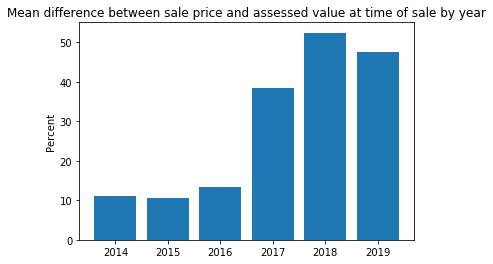

In [38]:

plt.bar(s['SaleYear'], s['AV Diff']['mean'])
plt.ylabel('Percent')
plt.title('Mean difference between sale price and assessed value at time of sale by year')
plt.show()

# Largest differences between sale price and AV at time of sale

In [48]:
sold[['ID', 'Code', 'Street', 'SaleYear', 'Sale Price', 'Sale AV', 'AV Diff']].sort_values(by=['AV Diff'], ascending=False).head(10).reset_index()

,index,ID,Code,Street,SaleYear,Sale Price,Sale AV,AV Diff
0,79,14-3-58,210,112 Orchard St,2015,252500.00,27500.00,818.18
1,360,26-3-67,210,133 Orchard St,2014,252500.00,27500.00,818.18
2,74,14-2-16.13,210,156 Orchard St,2018,201000.00,24600.00,717.07
3,492,38-4-11,220,53 Hasbrouck St,2018,205000.00,29800.00,587.92
4,597,45-6-19,210,44 Carson Ave,2017,261000.00,43700.00,497.25
5,479,38-1-15,220,190 W Parmenter St,2014,130000.00,22700.00,472.69
6,461,36-4-21,210,144 Washington St,2018,180000.00,40800.00,341.18
7,404,29-6-9,230,14 City Ter,2017,150000.00,37400.00,301.07
8,598,45-6-21,210,48 Carson Ave,2017,250000.00,65400.00,282.26
9,312,24-12-1,411,210 Liberty St,2017,235000.00,64600.00,263.78


# Single-family Sale Price vs Assessed Value 

In [57]:
single_family = sold[sold['Code'] == 210]
sold1 = single_family[['SaleYear', 'Sale Price', 'AV Diff']].groupby(['SaleYear']).agg(['count', 'mean']).reset_index()
sold1

SaleYear Sale Price           AV Diff      
                count      mean   count  mean
0     2014         54 158469.70      54 14.50
1     2015         60 124382.13      60  7.14
2     2016         54 137456.67      54  8.65
3     2017         87 164040.94      87 25.40
4     2018         91 158817.11      91 43.86
5     2019         10 128831.30      10 12.43

# Two-family Sale Price vs Assessed Value 

In [58]:
two_family = sold[sold['Code'] == 220]
sold2 = two_family[['SaleYear', 'Sale Price', 'AV Diff']].groupby(['SaleYear']).agg(['count', 'mean']).reset_index()
sold2

SaleYear Sale Price           AV Diff      
                count      mean   count  mean
0     2014         17 101911.76      17 13.65
1     2015         18  98222.22      18 22.47
2     2016         15 101333.33      15 10.17
3     2017         41 111863.51      41 36.75
4     2018         53 140315.09      53 68.29
5     2019         10 148500.00      10 70.75

# Three-family Sale Price vs Assessed Value 

In [59]:
three_family = sold[sold['Code'] == 230]
sold3 = three_family[['SaleYear', 'Sale Price', 'AV Diff']].groupby(['SaleYear']).agg(['count', 'mean']).reset_index()
sold3

SaleYear Sale Price           AV Diff       
                count      mean   count   mean
0     2014          4 136250.00       4 -11.58
1     2015          7  54576.86       7   5.28
2     2016         18 118411.11      18  30.84
3     2017         21 164531.14      21  70.91
4     2018         33 162015.15      33  55.24
5     2019          2 156500.00       2  74.38

# Apartments Sale Price vs Assessed Value 

In [66]:
apartments = sold[sold['Code'] == 411]
sold4 = apartments[['SaleYear', 'Sale Price', 'AV Diff']].groupby(['SaleYear']).agg(['count', 'mean']).reset_index()
sold4

SaleYear Sale Price           AV Diff       
                count      mean   count   mean
0     2014          4 190000.00       4  -8.64
1     2015          6 226333.17       6  43.50
2     2016         12 202583.33      12  14.43
3     2017         23 271500.00      23  57.87
4     2018         12 406666.67      12  39.62
5     2019          1 295000.00       1 111.32

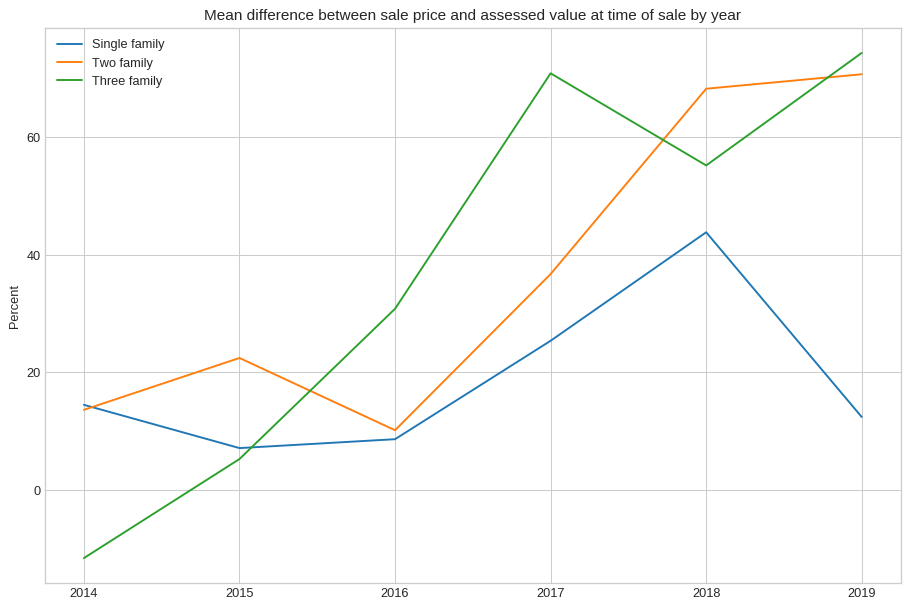

In [71]:
figure(num=None, figsize=(12, 8), dpi=92, facecolor='w', edgecolor='k')
plt.style.use('seaborn-whitegrid')

plt.plot(sold1['SaleYear'], sold1['AV Diff']['mean'], label='Single family')
plt.plot(sold2['SaleYear'], sold2['AV Diff']['mean'], label='Two family')
plt.plot(sold3['SaleYear'], sold3['AV Diff']['mean'], label='Three family')
plt.ylabel('Percent')
plt.title('Mean difference between sale price and assessed value at time of sale by year')
plt.legend(loc=2)
plt.show()

# Corridors with biggest increase in assessed value 2016-2019

In [86]:
def block_strip(x):
  last = x.rfind('-')
  spl = x.split('-', 2)
  return "-".join(spl[:2])

df['BlockID'] = df['ID'].apply(block_strip)
df['Total Dollar Increase'] = df['2019 Full'] - df['2016 Full']
df['Total Increase'] = 100 * (df['Total Dollar Increase'] / df['2016 Full'])
df_agg = df[['BlockID', 'Total Increase']].groupby('BlockID', as_index=False)['Total Increase'].agg({'avg':'mean', 'count':'count'})
df_agg[df_agg['count'] > 20].sort_values(by=['avg'], ascending=False).head(10)

,BlockID,avg,count
269,46-1,175.05,31
194,34-3,141.17,48
171,30-2,140.35,51
232,4-7,119.39,23
273,46-5,113.48,23
310,7-1,107.45,42
69,18-9,102.85,24
28,14-2,95.28,26
9,11-4,94.32,36
172,30-3,90.64,42


# Corridors with biggest decrease in assessed value 2016-2019

In [87]:
df_agg[df_agg['count'] > 20].sort_values(by=['avg'], ascending=True).head(10)

,BlockID,avg,count
296,52-1,-12.41,29
302,58-1,-9.86,121
301,57-1,-6.17,46
144,27-2,-4.41,33
131,25-5,-3.32,21
297,53-1,-1.20,68
49,17-1,-1.06,27
247,44-1,-0.77,24
130,25-4,-0.62,39
306,6-5,-0.31,22


# Increase in taxable properties per year

In [45]:
a = df[df['2016 City'] > 1].count()[0]
b = df[df['2017 City'] > 1].count()[0]
c = df[df['2018 City'] > 1].count()[0]
d = df[df['2019 City'] > 1].count()[0]
print("2016-17: %d, 2017-18: %d, 2018-19: %d" % (b-a, c-b, d-c))

2016-17: 40, 2017-18: 64, 2018-19: 64


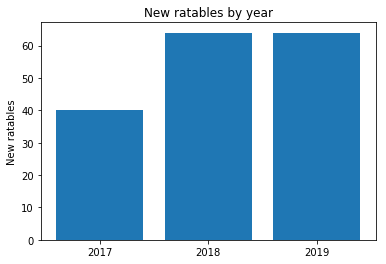

In [46]:

x = ['2017', '2018', '2019']
y = [b-a, c-b, d-c]
plt.bar(x, y)
plt.ylabel('New ratables')
plt.title('New ratables by year')
plt.show()

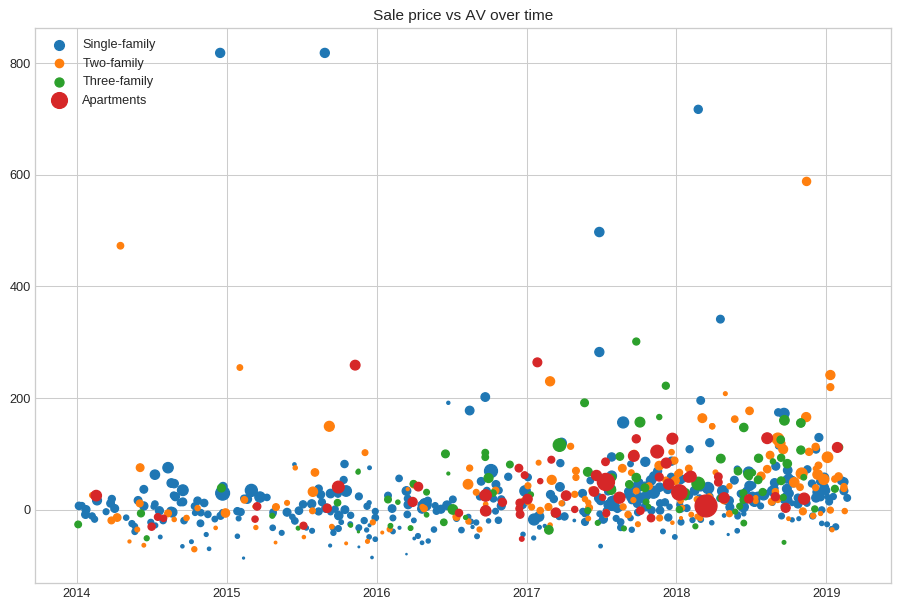

In [69]:

figure(num=None, figsize=(12, 8), dpi=92, facecolor='w', edgecolor='k')
plt.style.use('seaborn-whitegrid')

plt.scatter(single_family['SaleDateTime'], single_family['AV Diff'], label='Single-family', s=single_family['Sale Price']/5000)
plt.scatter(two_family['SaleDateTime'], two_family['AV Diff'], label='Two-family', s=two_family['Sale Price']/5000)
plt.scatter(three_family['SaleDateTime'], three_family['AV Diff'],  label='Three-family', s=three_family['Sale Price']/5000)
plt.scatter(apartments['SaleDateTime'], apartments['AV Diff'],  label='Apartments', s=apartments['Sale Price']/5000)
plt.title('Sale price vs AV over time')
plt.legend(loc=2)
plt.show()

# Do homes or apartments (codes 210,220,230,411) with recent sales result in higher assessment increases?

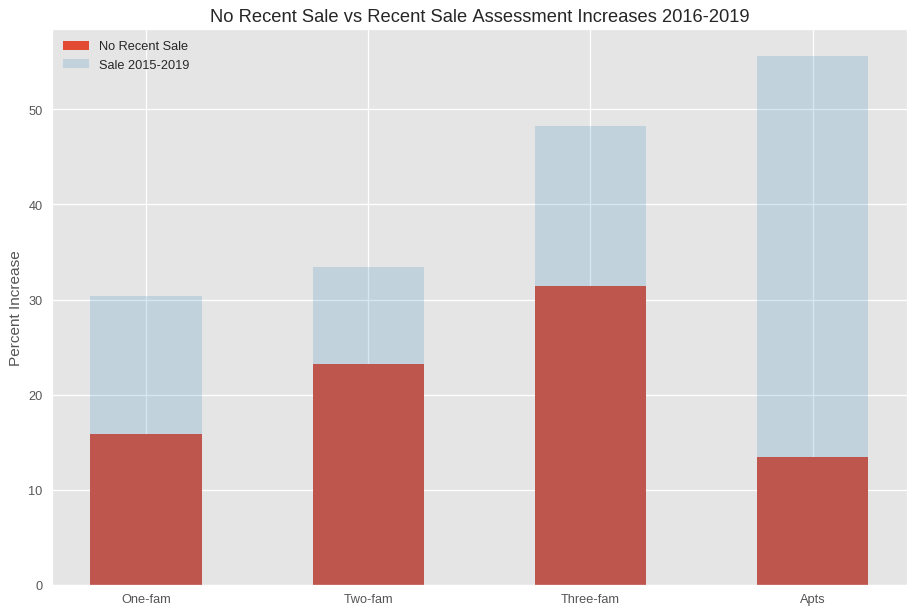

In [187]:
# Filter by all taxable properties, only apartments and residential
notsold = df[df['2019 City'] > 0].reset_index()
notsold = notsold[notsold['Sale Price'].isnull()]
notsold = notsold[notsold['Code'].isin([210,220,230,411])]

onlysold = sold[sold['Sale Price'].notnull()]
onlysold = onlysold[onlysold['SaleYear'] > 2014]
onlysold = onlysold[onlysold['Code'].isin([210,220,230,411])]

notsold_agg = notsold[['Code', 'Total Increase']].groupby('Code', as_index=False)['Total Increase'].agg({'avg':'mean', 'count':'count', 'std':'std'}).reset_index()
onlysold_agg = onlysold[['Code', 'Total Increase']].groupby('Code', as_index=False)['Total Increase'].agg({'avg':'mean', 'count':'count','std':'std'}).reset_index()

figure(num=None, figsize=(12, 8), dpi=92, facecolor='w', edgecolor='k')

plt.subplot(1,1,1)
plt.bar(['One-fam','Two-fam','Three-fam','Apts'], notsold_agg['avg'],  label='No Recent Sale', alpha=1, width=0.5)
plt.bar(['One-fam','Two-fam','Three-fam','Apts'], onlysold_agg['avg'], label='Sale 2015-2019',  alpha=0.2, width=0.5)
plt.ylabel('Percent Increase')
plt.title('No Recent Sale vs Recent Sale Assessment Increases 2016-2019')
plt.legend(loc=2)
plt.show()

